In [318]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf
from sklearn import metrics

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [347]:
data = pd.read_csv("../../FEATURE_ENGINEER/tablon_undert_58_q4.csv")

data = data[(data.TOTAL_CORNERS>2) & (data.TOTAL_CORNERS<8)]

tablon = data[data.YEARMONTH<202109][["AVG_CORNERSHOMED1_L3",
                                                                 "AVG_CORNERSHOMED2_L5", "AVG_CORNERSAWAYD1_L5",
                                      "CORNERS_DIV_SHOTS","AVG_CORNERSAWAYD2_L5", "LEAGUE_INGLATERRA", "TOTAL_CORNERS",
                                      "LAST_MINUTECORNER_H_L60", "LAST_MINUTECORNER_A_L60", "SUM_CORNERS_L60",
                                      "AVG_CORNERS_LOSE_HOME","CORNERS_A", "AVG_CORNERSHOMED1_L5", 
                                      "output","TOTAL_CORNERS_45_60"]]


X_validation = data[(data.YEARMONTH>=202109) & (data.YEARMONTH<202111)][["AVG_CORNERSHOMED1_L3","AVG_CORNERSHOMED2_L5",
                                                                          "AVG_CORNERSAWAYD1_L5",
                                      "CORNERS_DIV_SHOTS","AVG_CORNERSAWAYD2_L5", "LEAGUE_INGLATERRA", "TOTAL_CORNERS",
                                      "LAST_MINUTECORNER_H_L60", "LAST_MINUTECORNER_A_L60", "SUM_CORNERS_L60",
                                      "AVG_CORNERS_LOSE_HOME","CORNERS_A", "AVG_CORNERSHOMED1_L5", 
                                      "output","TOTAL_CORNERS_45_60"]]
y_validation = X_validation.pop("output")


X_validation_november = data[data.YEARMONTH>=202111][["AVG_CORNERSHOMED1_L3","AVG_CORNERSHOMED2_L5", "AVG_CORNERSAWAYD1_L5",
                                      "CORNERS_DIV_SHOTS","AVG_CORNERSAWAYD2_L5", "LEAGUE_INGLATERRA", "TOTAL_CORNERS",
                                      "LAST_MINUTECORNER_H_L60", "LAST_MINUTECORNER_A_L60", "SUM_CORNERS_L60",
                                      "AVG_CORNERS_LOSE_HOME","CORNERS_A", "AVG_CORNERSHOMED1_L5", 
                                      "output","TOTAL_CORNERS_45_60"]]
y_validation_november = X_validation_november.pop("output")

In [348]:
len_test = int(round(len(tablon)*0.3, 0))
len_train = int(round(len(tablon)*0.7, 0))

In [349]:
X_train = tablon[:len_train]
y_train = X_train.pop("output")
X_test = tablon[len_train:(len_train+len_test)]
y_test = X_test.pop("output")

In [350]:
X_train.shape, X_test.shape, X_validation.shape

((5162, 14), (2212, 14), (254, 14))

In [351]:
y_train.value_counts()

1    2705
0    2457
Name: output, dtype: int64

In [352]:
y_test.value_counts()

1    1251
0     961
Name: output, dtype: int64

In [353]:
y_validation.value_counts()

1    151
0    103
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [354]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=130, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.55591	validation_0-logloss:0.69263	validation_0-error:0.47197


/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-auc:0.55245	validation_0-logloss:0.69220	validation_0-error:0.46926
[2]	validation_0-auc:0.55695	validation_0-logloss:0.69172	validation_0-error:0.45976
[3]	validation_0-auc:0.56171	validation_0-logloss:0.69135	validation_0-error:0.46248
[4]	validation_0-auc:0.56491	validation_0-logloss:0.69089	validation_0-error:0.46745
[5]	validation_0-auc:0.56518	validation_0-logloss:0.69044	validation_0-error:0.45570
[6]	validation_0-auc:0.56682	validation_0-logloss:0.68997	validation_0-error:0.44439
[7]	validation_0-auc:0.56502	validation_0-logloss:0.68956	validation_0-error:0.45117
[8]	validation_0-auc:0.56625	validation_0-logloss:0.68922	validation_0-error:0.44982
[9]	validation_0-auc:0.56724	validation_0-logloss:0.68881	validation_0-error:0.44892
[10]	validation_0-auc:0.56789	validation_0-logloss:0.68840	validation_0-error:0.45208
[11]	validation_0-auc:0.56639	validation_0-logloss:0.68805	validation_0-error:0.45163
[12]	validation_0-auc:0.56779	validation_0-logloss:0.68764	vali

[97]	validation_0-auc:0.57268	validation_0-logloss:0.67458	validation_0-error:0.44394
[98]	validation_0-auc:0.57278	validation_0-logloss:0.67453	validation_0-error:0.44439
[99]	validation_0-auc:0.57264	validation_0-logloss:0.67451	validation_0-error:0.44530
[100]	validation_0-auc:0.57235	validation_0-logloss:0.67448	validation_0-error:0.44530
[101]	validation_0-auc:0.57250	validation_0-logloss:0.67445	validation_0-error:0.44756
[102]	validation_0-auc:0.57253	validation_0-logloss:0.67441	validation_0-error:0.44756
[103]	validation_0-auc:0.57241	validation_0-logloss:0.67439	validation_0-error:0.44620
[104]	validation_0-auc:0.57269	validation_0-logloss:0.67432	validation_0-error:0.44756
[105]	validation_0-auc:0.57286	validation_0-logloss:0.67427	validation_0-error:0.44846
[106]	validation_0-auc:0.57304	validation_0-logloss:0.67421	validation_0-error:0.44756
[107]	validation_0-auc:0.57312	validation_0-logloss:0.67417	validation_0-error:0.44711
[108]	validation_0-auc:0.57328	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

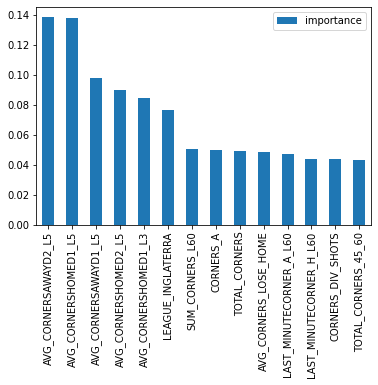

In [355]:
fu_dict = dict(zip(X_train.columns, model.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)

fi.plot.bar()

In [356]:
y_pred1 = model.predict(X_test)
confusion_matrix(y_test, y_pred1)

array([[459, 502],
       [494, 757]])

In [357]:
y_pred_proba = model.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.55, 1, 0)
cm1 = confusion_matrix(y_test, predict_mine)

In [358]:
cm1

array([[854, 107],
       [994, 257]])

In [359]:
metrics.accuracy_score(y_test, y_pred1)

0.5497287522603979

In [360]:
cm1[1][1]/(cm1[1][1]+cm1[0][1])

0.7060439560439561

In [361]:
(cm1[1][1]+cm1[0][1])/len(y_test)*100

16.455696202531644

# VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [362]:
y_pred = model.predict(X_validation)
confusion_matrix(y_validation, y_pred)

array([[53, 50],
       [53, 98]])

In [363]:
metrics.accuracy_score(y_validation, y_pred)

0.594488188976378

In [364]:
y_pred_proba = model.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.55, 1, 0)
cm1 = confusion_matrix(y_validation, predict_mine)

In [365]:
cm1[1][1]/(cm1[1][1]+cm1[0][1])

0.7755102040816326

In [366]:
(cm1[1][1]+cm1[0][1])/len(y_validation)*100

19.291338582677163

In [367]:
cm1

array([[ 92,  11],
       [113,  38]])

## FINAL VALIDATION - NOVEMBER 2021

In [368]:
y_pred = model.predict(X_validation_november)
confusion_matrix(y_validation_november, y_pred)

array([[29, 41],
       [33, 50]])

In [369]:
metrics.accuracy_score(y_validation_november, y_pred)

0.5163398692810458

In [370]:
y_pred_proba = model.predict_proba(X_validation_november)[:,1]
predict_mine = np.where(y_pred_proba > 0.55, 1, 0)
cm1 = confusion_matrix(y_validation_november, predict_mine)

In [371]:
cm1

array([[62,  8],
       [67, 16]])

In [372]:
cm1[1][1]/(cm1[1][1]+cm1[0][1])

0.6666666666666666

In [373]:
(cm1[1][1]+cm1[0][1])/len(y_validation_november)*100

15.686274509803921

In [374]:
#umbral --> 0.58; Condition --> TOTAL_CORNERS > 3
import pickle
file_name = "model_under4_60.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))


# OUTPUT

In [41]:
output = data[(data.YEARMONTH>=202111 )& (data.TOTAL_CORNERS>3)][["ID", "output", "CORNERS_H", "CORNERS_A", "TOTAL_CORNERS"]].reset_index(drop=True)

In [42]:
output["PROB_CORNERS"] = pd.DataFrame(model.predict_proba(X_validation_november)[:,1]).iloc[:, 0]\
    .apply(lambda x: 1 if x>0.6 else 0)

In [43]:
output[output.PROB_CORNERS==1]

,ID,output,CORNERS_H,CORNERS_A,TOTAL_CORNERS,PROB_CORNERS
13,S0oXCjk1,1,4,0,4,1
37,4Y8aXZPg,1,4,0,4,1
81,Y54DQS1n,1,0,4,4,1
